In [10]:
from scipy.io import arff
import math
import pandas as pd
from pandas import DataFrame
import sys, getopt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_mldata
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import decomposition
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
%matplotlib inline


In [11]:
# Step 1 -  . Convert to csv and load data 

def arff2csv(arff_path, csv_path=None, _encoding='utf8'):
    with open(arff_path, 'r', encoding=_encoding) as fr:
        attributes = []
        if csv_path is None:
            csv_path = arff_path[:-4] + 'csv'  # *.arff -> *.csv
        write_sw = False
        with open(csv_path, 'w', encoding=_encoding) as fw:
            for line in fr.readlines():
                if write_sw:
                    fw.write(line)
                elif '@data' in line:
                    fw.write(','.join(attributes) + '\n')
                    write_sw = True
                elif '@attribute' in line:
                    attributes.append(line.split()[1])  # @attribute attribute_tag numeric
    print("Convert {} to {}.".format(arff_path, csv_path))

arff2csv('data - original.arff', 'data - original.csv')


#data = arff.loadarff('data - original.arff')
#df = pd.DataFrame(data[0])
pd.set_option('display.max_columns', None)
missing_values = ["-1", " ", ""]
df = pd.read_csv('data - original.csv', na_values = missing_values);


# Step 1.1 data transformation
#Replace T /TRUE  with 1 , F.FALSE with 0

#df = df.replace(to_replace = 'T', value = 1)
#df = df.replace(to_replace = 'F', value = 0)

#remove spaces
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

#remove columns which are identified as non-influencing columns based on manual analysis
df = df.drop(['Fire_vehicles'],axis=1)
df = df.drop(['Occurrence_involving_freight'],axis=1)
df = df.drop(['Incident_involving_dangerous_freight'],axis=1)
df = df.drop(['Fire'],axis=1)
df = df.drop(['Intermittent_Semaphore'],axis=1)


#df['Fire_vehicles'] = df['Fire_vehicles'].map({'YES': 1, 'NO': 0});
df['Vehicle_excess'] = df['Vehicle_excess'].map({'T': 1, 'F': 0,'t': 1, 'f': 0,'NO': 0, 'YES': 1  })
df['Running_over'] = df['Running_over'].replace({'NO': 0, 'YES': 1})
df['Hour'] = df['Hour'].map({'7:00':1,'7:30':2,'8:00':3,'8:30':4,'9:00':5,'9:30':6,'10:00':7,                             '10:30':8,'11:00':9,'11:30':10,'12:00':11,'12:30':12,'13:00':13,
'13:30':14,'14:00':15,'14:30':16,'15:00':17,'15:30':18,'16:00':19,'16:30':20,
'17:00':21,'17:30':22,'18:00':23,'18:30':24,'19:00':25,'19:30':26,'20:00':27})
print(df.isnull().sum())

# Step 2 -  Finding Missing values 
#print(df.describe())
#print(df.isnull().sum())
print('no of records - ', df.shape)
print(df.info())
print(df.head())

#df.isnull().mean()

#Step 3  - visualize distrubution for columns which have missing data  

#Step 4   - Impute missing values

#Replace missing values in Accident_Victim with mean
print ('floor of mean of accident_victim  ',math.floor(df['Accident_victim'].mean()))
       
df['Accident_victim'].fillna(math.floor(df['Accident_victim'].mean()), inplace=True)
df['Vehicle_excess'].fillna(0,inplace=True);
df['Running_over'].fillna(0,inplace=True);
#df['Fire_vehicles'].fillna(0,inplace=True);
#df['Incident_involving_dangerous_freight'].fillna(0,inplace=True);
df['Manifestations'].fillna(0,inplace=True);
df['Defect_in_the_network_of_trolleybuses'].fillna(0,inplace=True);
df['Semaphore_off'].fillna(0,inplace=True);

#drop duplicates 
print("Before duplicate removal",df.info())
DataFrame.drop_duplicates(df, inplace = True);
print("After duplicate removal",df.info())

print(df.isnull().sum())




Convert data - original.arff to data - original.csv.
Hour                                     0
Immobilized_bus                          0
Broken_Truck                             0
Vehicle_excess                           0
Accident_victim                          2
Running_over                             0
Lack_of_electricity                      0
Point_of_flooding                        0
Manifestations                           1
Defect_in_the_network_of_trolleybuses    2
Tree_on_the_road                         0
Semaphore_off                            1
Slowness_in_traffic_percent              0
dtype: int64
no of records -  (140, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 13 columns):
Hour                                     140 non-null int64
Immobilized_bus                          140 non-null float64
Broken_Truck                             140 non-null float64
Vehicle_excess                           140 non-null int64

<Figure size 432x288 with 0 Axes>

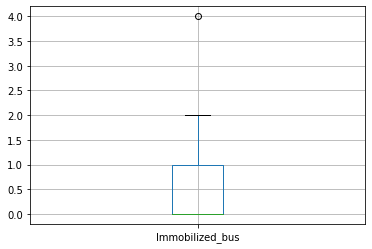

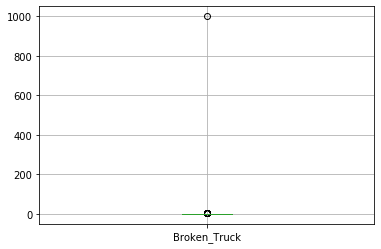

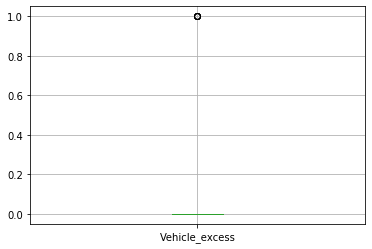

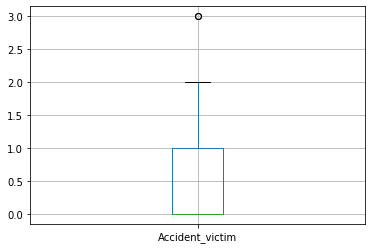

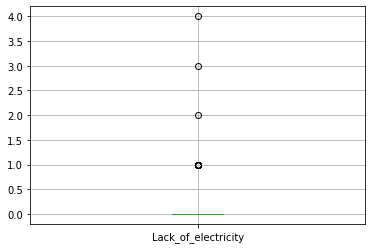

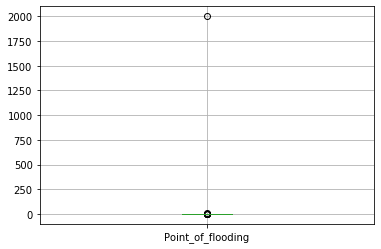

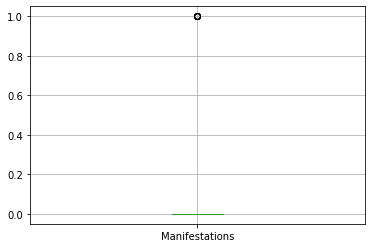

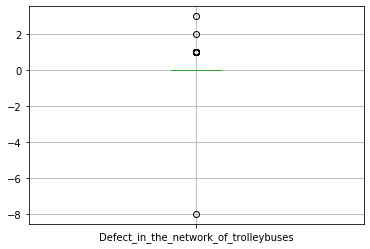

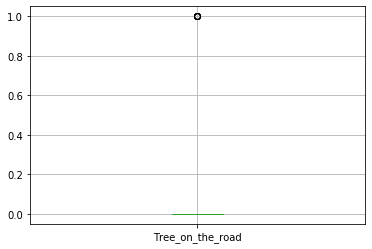

<Figure size 432x288 with 0 Axes>

In [12]:
#Step 5 check outliers

boxplot = df.boxplot(column=['Immobilized_bus'])
plt.figure()
boxplot = df.boxplot(column=['Broken_Truck'])
plt.figure()
boxplot = df.boxplot(column=['Vehicle_excess'])
plt.figure()
boxplot = df.boxplot(column=['Accident_victim'])
plt.figure()
#boxplot = df.boxplot(column=['Running_over'])
#plt.figure()
#boxplot = df.boxplot(column=['Fire_vehicles'])
#plt.figure()
#boxplot = df.boxplot(column=['Occurrence_involving_freight'])
#plt.figure()
#boxplot = df.boxplot(column=['Incident_involving_dangerous_freight'])
#plt.figure()
boxplot = df.boxplot(column=['Lack_of_electricity'])
plt.figure()
# = df.boxplot(column=['Fire'])
#plt.figure()
boxplot = df.boxplot(column=['Point_of_flooding'])
plt.figure()
boxplot = df.boxplot(column=['Manifestations'])
plt.figure()
boxplot = df.boxplot(column=['Defect_in_the_network_of_trolleybuses'])
plt.figure()
boxplot = df.boxplot(column=['Tree_on_the_road'])
plt.figure()
#boxplot = df.boxplot(column=['Semaphore_off'])
#plt.figure()
#boxplot = df.boxplot(column=['Intermittent_Semaphore'])
#plt.figure()





In [13]:
#Step - remove outlier value 
df = df[df.Broken_Truck < 1000]
df = df[df.Point_of_flooding < 2000]
print (df.info())

#Step - Feature Selection
# Splitting the data into train and 
X = df.drop(['Slowness_in_traffic_percent'],axis=1)
print (df.info())
# Putting response variable to y
y = df['Slowness_in_traffic_percent']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size=0.3,random_state=100)

print(df)
#Step - Model building

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 0 to 139
Data columns (total 13 columns):
Hour                                     132 non-null int64
Immobilized_bus                          132 non-null float64
Broken_Truck                             132 non-null float64
Vehicle_excess                           132 non-null int64
Accident_victim                          132 non-null float64
Running_over                             132 non-null object
Lack_of_electricity                      132 non-null float64
Point_of_flooding                        132 non-null float64
Manifestations                           132 non-null float64
Defect_in_the_network_of_trolleybuses    132 non-null float64
Tree_on_the_road                         132 non-null float64
Semaphore_off                            132 non-null float64
Slowness_in_traffic_percent              132 non-null float64
dtypes: float64(10), int64(2), object(1)
memory usage: 14.4+ KB
None
<class 'pandas.core.frame

In [17]:
#print(df.isna().any())

X_train = StandardScaler().fit_transform(X_train) # normalizing the features

pca = PCA(n_components=5)
pca.fit(X_train)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

X_train_transformed  = pca.transform(X_train);
print("PCA transforfm data", X_train_transformed)

X_test_transformed  = pca.transform(X_test);

# Create the model
model1 = LinearRegression()
# Train the model, using training data set
model1.fit(X_train_transformed, y_train)

# The coefficients

# print the parameter theta1
print('Coefficient = Theta1 = ', model1.coef_)
# print the parameter theta0
print('Intercept = Theta0 = ', model1.intercept_)

y_predicted = model1.predict(X_test_transformed)

print ("predicted slowness value", y_predicted)








[2.23475961 1.59754829 1.42354396 1.11065281 1.04917927]
[0.18420573 0.13168197 0.11733922 0.09154838 0.08648126]
[0.18420573 0.3158877  0.43322692 0.52477529 0.61125656]
PCA transforfm data [[-9.17592259e-01 -7.89752821e-02 -7.49105045e-01  2.25568210e-02
  -5.44837590e-01]
 [ 2.24330946e-01 -1.40208302e+00  1.29686559e+00 -1.64199960e+00
  -2.86658295e-01]
 [ 4.88327328e+00 -1.56529331e+00 -2.69868417e+00  2.95010875e+00
  -3.17782279e-01]
 [ 3.60296128e-02 -1.55035282e+00  6.92682483e-01 -8.45477061e-01
  -3.94096643e-01]
 [-1.08608440e+00 -1.33741380e+00 -4.80359368e-01 -8.65868342e-01
   2.97770679e+00]
 [-6.08208740e-01  9.33243744e-02 -4.50794734e-01 -2.65924781e-01
  -4.73613641e-01]
 [-4.47819091e-01 -6.38135850e-01 -4.23017138e-01  8.07185288e-02
  -5.14072104e-01]
 [ 5.41807889e-01 -1.21680615e+00 -2.62205044e-01  6.65551026e-01
  -5.03512514e-01]
 [-1.13112552e+00  1.75188612e-01 -8.97326821e-01 -3.88031885e-03
  -5.58821901e-01]
 [-1.25924547e+00  3.27686949e-01 -9.8625988